In [168]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
!pip install xgboost
# !pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/4f/4c/4969b10939c4557ae46e5569d07c0c7ce772b3d6b9c1401a6ed07059fdee/xgboost-0.81.tar.gz
    Complete output from command python setup.py egg_info:
    ++ pwd
    + oldpath=/private/var/folders/c8/hxjv8y492g59qvw1n8xpdjlc0000gn/T/pip-install-yhmgzo5r/xgboost
    + cd ./xgboost/
    + echo darwin18
    + grep -q darwin
    + LIB_XGBOOST=libxgboost.dylib
    + which g++-5
    + which g++-7
    + which clang++
    /anaconda3/bin/clang++
    + export CC=clang
    + CC=clang
    + export CXX=clang++
    + CXX=clang++
    + make clean
    Makefile:31: MAKE [/Library/Developer/CommandLineTools/usr/bin/make] - checked OK
    rm -f -rf build build_plugin lib bin *~ */*~ */*/*~ */*/*/*~ */*.o */*/*.o */*/*/*.o #xgboost
    rm -f -rf build_tests *.gcov tests/cpp/xgboost_test
    if [ -d "R-package/src" ]; then \
    		cd R-package/src; \
    		rm -f -rf rabit src include dmlc-core amalgamation *.so *.dll; \
    		cd /private/var/folders/c8/hxjv

Command "python setup.py egg_info" failed with error code 1 in /private/var/folders/c8/hxjv8y492g59qvw1n8xpdjlc0000gn/T/pip-install-yhmgzo5r/xgboost/


In [159]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_csv("solar_desaldata v4.0.csv", encoding = "ISO-8859-1")

In [64]:
df1 = pd.read_csv('solar_desal_with_h2o.csv')

In [149]:
df1["Capacity (m3/d)"] = df1["Capacity (m3/d)"].apply(convert)
X["Capacity (m3/d)"] = X["Capacity (m3/d)"].apply(convert)

In [65]:
df2 = df1.filter(items=['Capacity (m3/d)','Country','Customer type','Inflation Adjusted EPC','Feedwater','Location type','Technology'])

In [80]:
df1.isnull().sum().reset_index()[df1.isnull().sum().reset_index()[0]<500]

,index,0
0,Capacity (m3/d),0
1,Country,0
2,Customer type,0
3,Inflation Adjusted EPC,0
4,Feedwater,0
5,Location type,0


In [52]:
df3 = df2.dropna()

In [72]:
def convert(v):
    try:
        x = str(v).replace(",","")
        x = float(x)
        return x
    except Exception as e:
        print(e)
        return None

In [83]:
df3["Capacity (m3/d)"] = df3["Capacity (m3/d)"].apply(convert)

In [84]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8746 entries, 0 to 8747
Data columns (total 7 columns):
Capacity (m3/d)           8746 non-null float64
Country                   8746 non-null object
Customer type             8746 non-null object
Inflation Adjusted EPC    8746 non-null float64
Feedwater                 8746 non-null object
Location type             8746 non-null object
Technology                8746 non-null object
dtypes: float64(2), object(5)
memory usage: 546.6+ KB


In [89]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
categorical_feature_mask = df3.dtypes==object
categorical_cols = df3.columns[categorical_feature_mask].tolist()
# # instantiate OneHotEncoder
# ohe = preprocessing.OneHotEncoder()
# ohe.fit(df2)

In [90]:
categorical_cols

['Country', 'Customer type', 'Feedwater', 'Location type', 'Technology']

In [131]:
# Get dummies
X = pd.get_dummies(df2,columns=['Country', 'Customer type', 'Feedwater', 'Location type', 'Technology'],prefix_sep='_', drop_first=True)
# X head
X.head()

,Capacity (m3/d),Inflation Adjusted EPC,Country_Angola,Country_Anguilla,Country_Antarctica,Country_Antigua and Barbuda,Country_Argentina,Country_Aruba,Country_Australia,Country_Austria,...,Feedwater_Wastewater,Location type_Mobile,Location type_Offshore,Technology_FO (Forward Osmosis),Technology_MED (Multi-effect Distillation),Technology_MSF (Multi-stage Flash),Technology_NF (Nanofiltration),Technology_NF / Sulfate Removal,Technology_RO (Reverse Osmosis),Technology_VC (Vapour Compression)
0,"14,000",4.530376e+06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,"14,000",1.556317e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,"10,000",3.296515e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,"5,760",2.507179e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,"5,678",2.434660e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
df3.isnull().sum().reset_index()

,index,0
0,Capacity (m3/d),0
1,Country,0
2,Customer type,0
3,Inflation Adjusted EPC,0
4,Feedwater,0
5,Location type,0
6,Technology,0


Prior file size 6823
New file size 6823


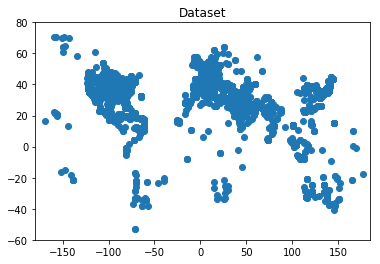

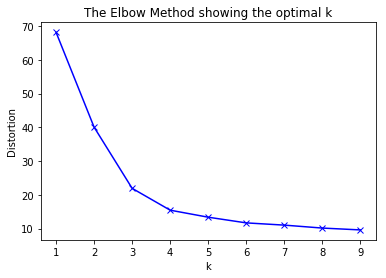

In [103]:
print("Prior file size "+str(len(df1)))
df1 = df1[(df1['Latitude'].notna()) & (df1['Longitude'].notna())]
df1 = df1[df1['Capacity (MGD)'].notna()]
print("New file size "+str(len(df1)))

dfs = np.random.rand(len(df1)) < 0.7
train = df1[dfs]
test = df1[~dfs]

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

x2 = train['Latitude']
x1 = train['Longitude']

plt.plot()
plt.xlim([-180, 185])
plt.ylim([-60, 80])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [104]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(train[['Latitude','Longitude']])

In [105]:
print(train.iloc[np.where(kmeans.labels_ == 0)[0]]['Country'].unique())
print(train.iloc[np.where(kmeans.labels_ == 1)[0]]['Country'].unique())
print(train.iloc[np.where(kmeans.labels_ == 2)[0]]['Country'].unique())
print(train.iloc[np.where(kmeans.labels_ == 3)[0]]['Country'].unique())

['Algeria' 'Austria' 'Belarus' 'Belgium' 'Cabo Verde' 'Czech Republic'
 'Denmark' 'Finland' 'France' 'Germany' 'Gibraltar' 'Greece' 'Guinea'
 'Hungary' 'Ireland' 'Italy' 'Libya' 'Liechtenstein' 'Malta' 'Mauritania'
 'Morocco' 'Netherlands' 'Nigeria' 'Poland' 'Portugal' 'Russia'
 'Saint Helena' 'Serbia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Tunisia' 'Turkey' 'U.K.' 'U.S.A.' 'United Arab Emirates']
['Azerbaijan' 'Bahrain' 'Botswana' 'Cyprus'
 'Democratic Republic of the Congo' 'Egypt' 'France' 'Greece' 'India'
 'Iran' 'Iraq' 'Israel' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Lebanon'
 'Libya' 'Maldives' 'Namibia' 'Oman' 'Pakistan' 'Palestine' 'Qatar'
 'Republic of Djibouti' 'Russia' 'Saudi Arabia' 'Somalia' 'South Africa'
 'Sudan' 'Syria' 'Turkey' 'Turkmenistan' 'Ukraine' 'United Arab Emirates'
 'Yemen']
['Anguilla' 'Antigua and Barbuda' 'Argentina' 'Aruba' 'Bahamas' 'Belize'
 'Bermuda' 'Bonaire, Sint Eustatius and Saba' 'Brazil'
 'British Virgin Islands' 'Canada' 'Cayman Islands' 'C

In [106]:
train['GeoCluster'] = kmeans.labels_

<Figure size 2016x1296 with 0 Axes>

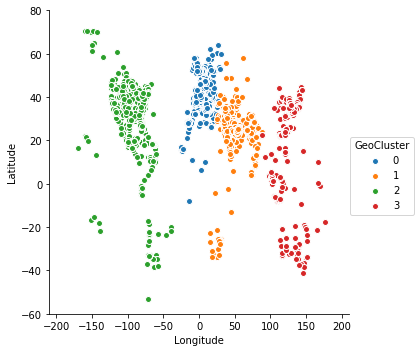

<Figure size 2016x1296 with 0 Axes>

In [107]:
sns.pairplot(x_vars=["Longitude"], y_vars=["Latitude"], data=train, hue="GeoCluster", size=5)
plt.xlim([-210, 210])
plt.ylim([-60, 80])
plt.figure(figsize=(28, 18))

In [108]:
cluster_summary = {}
for k in range(4):
    cluster_data = train.iloc[np.where(kmeans.labels_ == k)[0]]
    field_summary = {}
    field_set = ['Capacity (m3/d)','Inflation Adjusted EPC']
    for f in field_set:
        field = cluster_data[f].dropna(inplace=False)
        field_summary[f] = {'mean':field.mean(), 'sdev':field.std()}
    cluster_summary[k] = field_summary

In [109]:
cluster_summary

{0: {'Capacity (m3/d)': {'mean': 1947.710447761194,
   'sdev': 3904.2841392731116},
  'Inflation Adjusted EPC': {'mean': 4845037.373435221,
   'sdev': 6943401.451129845}},
 1: {'Capacity (m3/d)': {'mean': 1456.081118881119,
   'sdev': 3413.5227018788487},
  'Inflation Adjusted EPC': {'mean': 3915254.957074685,
   'sdev': 6675664.387937141}},
 2: {'Capacity (m3/d)': {'mean': 2742.082930756844, 'sdev': 5549.402080623094},
  'Inflation Adjusted EPC': {'mean': 5265876.252823181,
   'sdev': 6799604.9361362355}},
 3: {'Capacity (m3/d)': {'mean': 1362.3034420289855,
   'sdev': 2132.8648004239512},
  'Inflation Adjusted EPC': {'mean': 3056583.2880131328,
   'sdev': 4583203.604372566}}}

In [110]:
#Set cluster and fill missing water data in test set
test['GeoCluster'] = kmeans.predict(test[['Longitude','Latitude']])

In [111]:
#Normalize continuous variables by standard deviation
def clusterNormalize(value,field,cluster):
    #print('enter')
    return value/(cluster_summary.get(cluster).get(field).get('sdev'))

In [92]:
for f in ['Capacity (MGD)','Units','Inflation Adjusted Water Cost']:
    X = pd.DataFrame(X.apply(lambda x:float(clusterNormalize(x[f],f,x['GeoCluster'])),axis=1)).set_index(input_frame.index)
    input_frame[f] = input_norm

NameError: name 'input_frame' is not defined

In [116]:
train.shape[0]+test.shape[0]

6823

In [138]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8748 entries, 0 to 8747
Columns: 158 entries, Capacity (m3/d) to Technology_VC (Vapour Compression)
dtypes: float64(1), object(1), uint8(156)
memory usage: 1.4+ MB


In [139]:
X["Inflation Adjusted EPC"].mean()

3970507.5608047666

In [150]:
mean = X["Capacity (m3/d)"].mean()
# mean_1 = X["Inflation Adjusted EPC"].mean()

In [151]:
X["Capacity (m3/d)"] = X["Capacity (m3/d)"].apply(lambda x:x/mean)

In [145]:
X["Inflation Adjusted EPC"] = X["Inflation Adjusted EPC"].apply(lambda x:x/mean_1)

In [175]:
X.columns = X.columns.str.replace("<", "_")

In [206]:
X = X.dropna()

In [227]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(X, test_size = 0.3)
y_train = train[['Inflation Adjusted EPC']]
x_train = train.drop("Inflation Adjusted EPC",axis=1)
y_test = test[['Inflation Adjusted EPC']]
x_test = test.drop("Inflation Adjusted EPC",axis=1)

In [240]:
from sklearn.preprocessing import LabelEncoder
import xgboost
from sklearn.metrics import mean_squared_error

xgb = xgboost.XGBRegressor(colsample_bytree=0.8, subsample=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=0.1, reg_lambda=0.3, gamma=0.01, 
                             silent=1, random_state =7, nthread = -1)


xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
y_test = xgb.predict(x_train)

In [241]:
RMSE = np.sqrt(mean_squared_error(y_train, y_test))
print(RMSE.round(4))

0.5526


In [172]:
for i in X.columns:
    if "<" in i:
        print(i)

Customer type_Industry (TDS <10ppm)
Customer type_Irrigation (TDS <1000ppm)
Customer type_Municipalities as drinking water (TDS 10ppm - <1000ppm)
Customer type_Power stations (TDS <10ppm)
Customer type_Tourist facilities as drinking water (TDS 10ppm - <1000ppm)
Feedwater_Pure water or tap water (TDS <500ppm)
Feedwater_River water or low concentrated saline water (TDS 500ppm - <3000ppm)


In [230]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train,np.ravel(y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [231]:
model.score(x_test,y_test)

0.7885285029912957

Text(0.5, 0, 'Relative Importance')

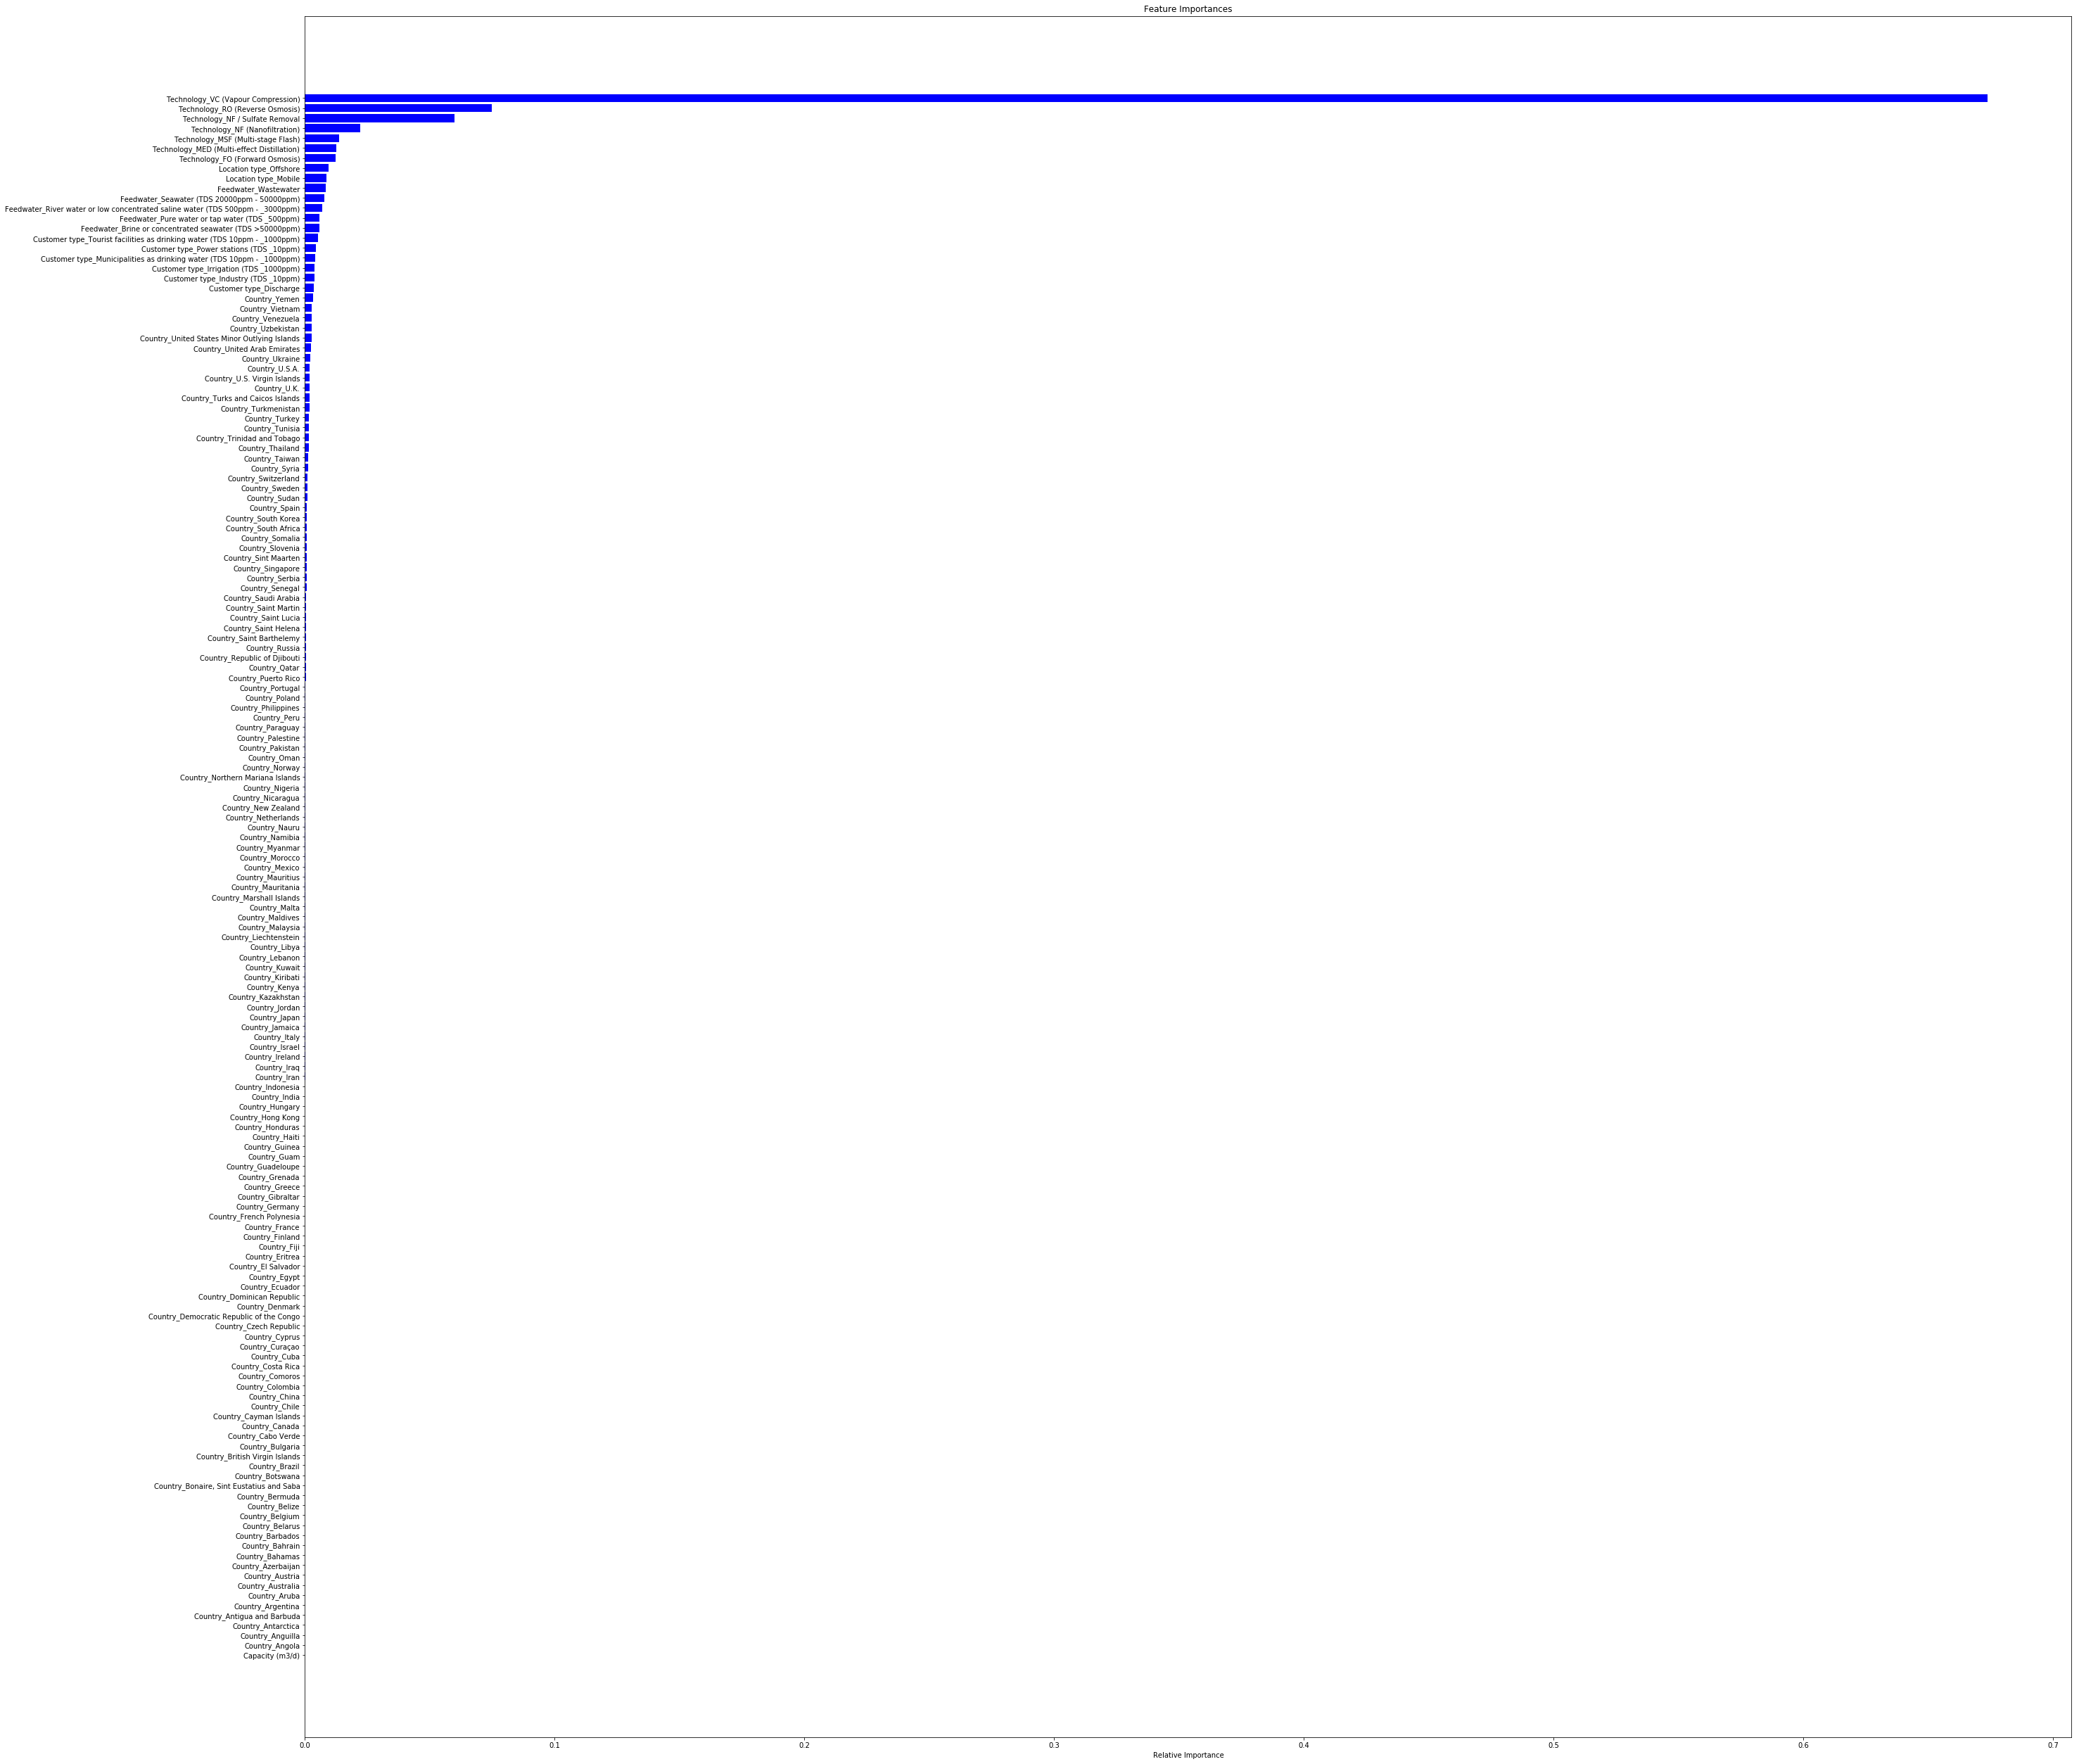

In [239]:
feature_names = [key for key in X if not key=="Inflation Adjusted EPC"]
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(45,45))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

In [238]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6122 entries, 2693 to 7522
Data columns (total 1 columns):
Inflation Adjusted EPC    6122 non-null float64
dtypes: float64(1)
memory usage: 95.7 KB


In [195]:
x_train = x_train.fillna(x_train.mean())
y_train = y_train.fillna(y_train.mean())

In [225]:
print(x_train.shape,y_train.shape)

(6122, 157) (6122, 1)


In [226]:
print(x_test.shape,y_test.shape)

(2625, 157) (6122,)
